In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [3]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df  #gpa - promedio en su carrera como trabajador

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0
...,...,...,...,...,...
105,80765.0,1.0,3.12,1.0,2.0
106,77081.0,0.0,3.36,0.0,5.0
107,60024.0,0.0,2.51,1.0,3.0
108,71606.0,1.0,2.89,0.0,8.0


In [7]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'], axis = 1)  
#Se desechan de X las variables que no se van a usar y nos quedamos con gpa y experien
#La x minuscula se usa para una variable y la X para mas variables

In [15]:
reg_lin = sm.OLS( y , sm.add_constant(X)).fit()   #OLS Ordinary List Square
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           7.37e-38
Time:                        11:43:42   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
gpa         2.024e+04   1364.423     14.831      0.000    1.75e+04    2.29e+04
experien    1973.1918    148.539     13.284      0.000    1678.730    2267.653
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.857
Skew:                          -0.191   Prob(JB):                        0.651
Kurtosis:                       2.795   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

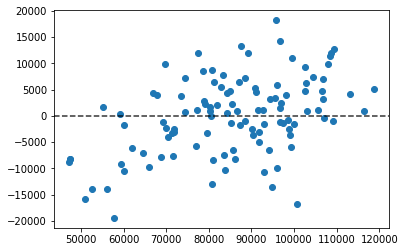

In [9]:
#Se crea una figura de los errores
fig, ax = plt.subplots()

y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter(y, y - y_pred)

plt.axhline(y=0, color = 'black', alpha = 0.8, linestyle = '--')
#Los errores se distribuyen alrededor del 0 

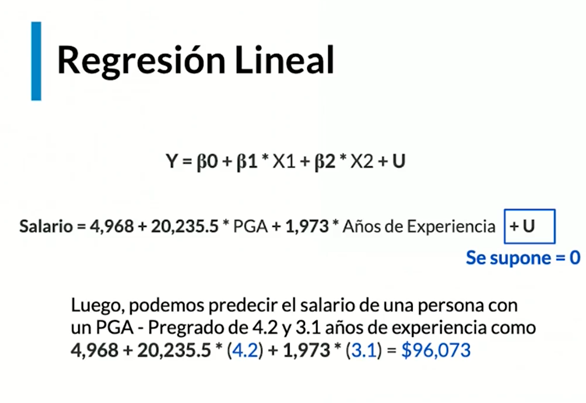
